<a href="https://colab.research.google.com/github/ProbablyBenjamin/COMP5512022/blob/main/Copy_of_final_comp_551_a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1

ACQUIRING **HEPATITIS**

In [ ]:
#acquire data
!pip3 install wget
import wget
url1 = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
hepatitis = wget.download(url1)

In [ ]:
#imports
import numpy as np
from scipy.io import arff
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#loading data with header
np.random.seed(420)
hepatitisDataset =  pd.read_csv('hepatitis.data', sep=",", header = None)
hepatitisDataset.columns =  ["life", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "BIG", "FIRM", "SPLEEN_PALPABLE", "SPIDERS", "ASCITES" , "VARICES", "BILIRUBIN", "ALK_PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY" ]

ACQUIRING **DIABETIC RETINOPATHY**

In [ ]:
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'
messidor_features = wget.download(url2)

In [ ]:
#load data and set header 
data = arff.loadarff('messidor_features.arff')
diabetesDataset = pd.DataFrame(data[0])
diabetesDataset.columns =  ["quality", "pre_screen", "ma0.5", "ma0.6", "ma0.7", "ma0.8", "ma0.9", "ma1.0", "ex0.5", "ex0.6", "ex0.7", 
          "ex0.8" , "ex0.9", "ex1.0", "exx1.0", "exx1.0", "dis", "dia", "amfm", "dr" ]
diabetesDataset

,quality,pre_screen,ma0.5,ma0.6,ma0.7,ma0.8,ma0.9,ma1.0,ex0.5,ex0.6,ex0.7,ex0.8,ex0.9,ex1.0,exx1.0,exx1.0,dis,dia,amfm,dr
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


ANALYSING **HEPATITIS** AND CLEANING IT

In [ ]:
#Checking number of "?"
hepatitisDataset.isin(['?']).sum(axis=0)

life                0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
BIG                10
FIRM               11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [ ]:
#protime has 67 ?, so we drop it
hepatitisDataset = hepatitisDataset.drop("PROTIME", 1)
#getting rid of all question marks
hepatitisDataset = hepatitisDataset[~hepatitisDataset.eq('?').any(1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#converting all the categorical data to one hot encoding
hepatitisDataset['life'] = hepatitisDataset['life'].replace({2:0, 4:1})
hepatitisDataset['SEX'] = hepatitisDataset['SEX'].replace({2:0, 4:1})
hepatitisDataset['STEROID'] = hepatitisDataset['STEROID'].replace({2:0, 4:1})
hepatitisDataset['ANTIVIRALS'] = hepatitisDataset['ANTIVIRALS'].replace({2:0, 4:1})
hepatitisDataset['FATIGUE'] = hepatitisDataset['FATIGUE'].replace({2:0, 4:1})
hepatitisDataset['MALAISE'] = hepatitisDataset['MALAISE'].replace({2:0, 4:1})
hepatitisDataset['ANOREXIA'] = hepatitisDataset['ANOREXIA'].replace({2:0, 4:1})
hepatitisDataset['BIG'] = hepatitisDataset['BIG'].replace({2:0, 4:1})
hepatitisDataset['FIRM'] = hepatitisDataset['FIRM'].replace({2:0, 4:1})
hepatitisDataset['SPLEEN_PALPABLE'] = hepatitisDataset['SPLEEN_PALPABLE'].replace({2:0, 4:1})
hepatitisDataset['SPIDERS'] = hepatitisDataset['SPIDERS'].replace({2:0, 4:1})
hepatitisDataset['ASCITES'] = hepatitisDataset['ASCITES'].replace({2:0, 4:1})
hepatitisDataset['VARICES'] = hepatitisDataset['VARICES'].replace({2:0, 4:1})
hepatitisDataset['HISTOLOGY'] = hepatitisDataset['HISTOLOGY'].replace({2:0, 4:1})
#converting to numerical
hepatitisDataset = hepatitisDataset.astype(float)
hepatitisDataset

,life,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,BIG,FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,0.0,30.0,0.0,1.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,1.0
1,0.0,50.0,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,1.0
2,0.0,78.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,1.0
5,0.0,34.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,1.0
10,0.0,39.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,36.0,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.6,120.0,30.0,4.0,0.0
151,0.0,44.0,1.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,0.0
152,0.0,61.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,0.0
153,0.0,53.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,0.0


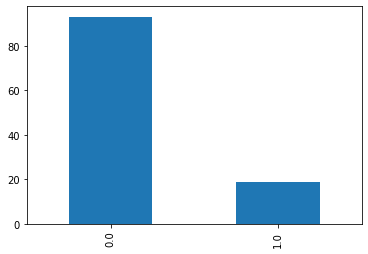

In [ ]:
#distribution of the positive and negative classes
pd.value_counts(hepatitisDataset['life']).plot.bar()
plt.show()

In [ ]:
# distribution of the numerical data
numerical = hepatitisDataset[["AGE","BILIRUBIN","ALK_PHOSPHATE","SGOT","ALBUMIN"]]
numerical.describe()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,41.196429,1.272321,105.491071,78.616071,3.834821
std,12.150586,0.886252,53.295707,68.761010,0.576368
min,7.000000,0.300000,26.000000,14.000000,2.100000
25%,32.000000,0.700000,72.000000,30.000000,3.500000
50%,39.000000,1.000000,85.000000,56.500000,4.000000
75%,50.000000,1.400000,133.500000,98.000000,4.200000
max,78.000000,4.800000,295.000000,420.000000,5.300000


In [ ]:
#normalizing the numerical data
hepatitisDataset["AGE"] = (hepatitisDataset["AGE"]-hepatitisDataset["AGE"].min())/(hepatitisDataset["AGE"].max()-hepatitisDataset["AGE"].min())
hepatitisDataset["BILIRUBIN"] = (hepatitisDataset["BILIRUBIN"]-hepatitisDataset["BILIRUBIN"].min())/(hepatitisDataset["BILIRUBIN"].max()-hepatitisDataset["BILIRUBIN"].min())
hepatitisDataset["ALK_PHOSPHATE"] = (hepatitisDataset["ALK_PHOSPHATE"]-hepatitisDataset["ALK_PHOSPHATE"].min())/(hepatitisDataset["ALK_PHOSPHATE"].max()-hepatitisDataset["ALK_PHOSPHATE"].min())
hepatitisDataset["SGOT"] = (hepatitisDataset["SGOT"]-hepatitisDataset["SGOT"].min())/(hepatitisDataset["SGOT"].max()-hepatitisDataset["SGOT"].min())
hepatitisDataset["ALBUMIN"] = (hepatitisDataset["ALBUMIN"]-hepatitisDataset["ALBUMIN"].min())/(hepatitisDataset["ALBUMIN"].max()-hepatitisDataset["ALBUMIN"].min())
hepatitisDataset

,life,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,BIG,FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,0.0,0.323944,0.0,1.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.155556,0.219331,0.009852,0.59375,1.0
1,0.0,0.605634,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.133333,0.405204,0.068966,0.43750,1.0
2,0.0,1.000000,1.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.088889,0.260223,0.044335,0.59375,1.0
5,0.0,0.380282,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.133333,0.256506,0.034483,0.59375,1.0
10,0.0,0.450704,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.222222,0.193309,0.039409,0.71875,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,0.408451,1.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.066667,0.349442,0.039409,0.59375,0.0
151,0.0,0.521127,1.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.133333,0.371747,0.315271,0.68750,0.0
152,0.0,0.760563,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.111111,0.182156,0.014778,0.62500,0.0
153,0.0,0.647887,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,0.266667,0.204461,0.012315,0.62500,0.0


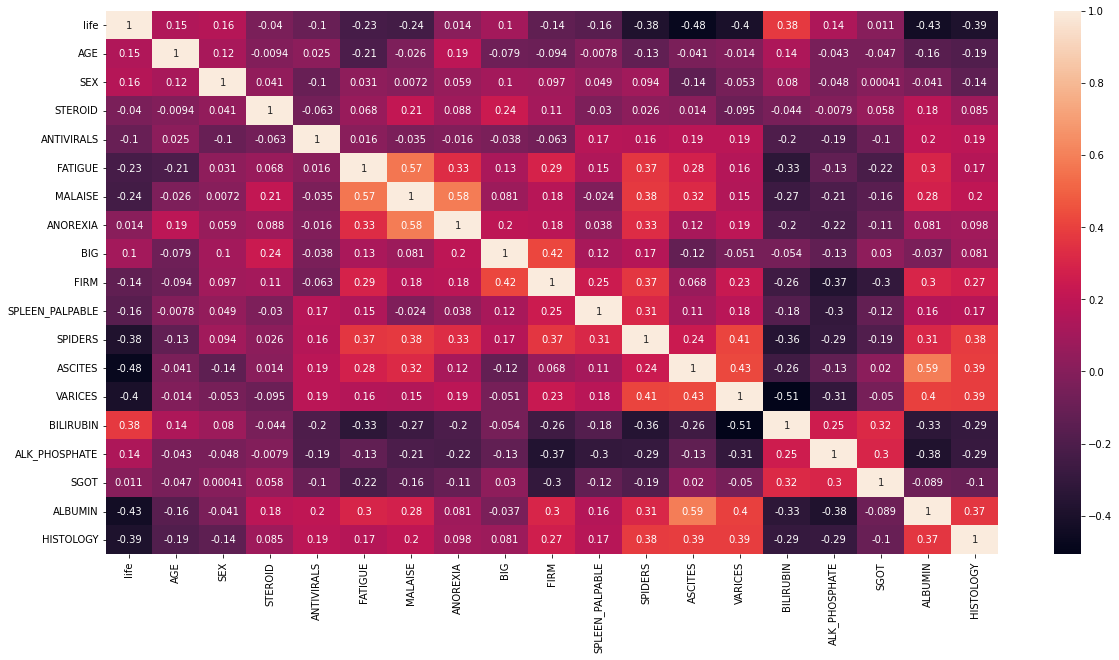

In [ ]:
#Plotting the Correlation
cor = hepatitisDataset.corr(method ='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

#

In [ ]:
#finally getting the target array
target = hepatitisDataset['life']
hepatitisDataset = hepatitisDataset.drop('life', 1)
hepatitisDataset = hepatitisDataset.to_numpy()
target = target.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


ANALYSING **DIABETIC RETINOPATHY** AND CLEANING IT

In [ ]:
#changed categorical to numerical
diabetesDataset['dr'] = diabetesDataset['dr'].apply(lambda x: float(x.decode("utf-8")))
diabetesDataset


,quality,pre_screen,ma0.5,ma0.6,ma0.7,ma0.8,ma0.9,ma1.0,ex0.5,ex0.6,ex0.7,ex0.8,ex0.9,ex1.0,exx1.0,exx1.0,dis,dia,amfm,dr
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,0.0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,0.0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,0.0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,1.0


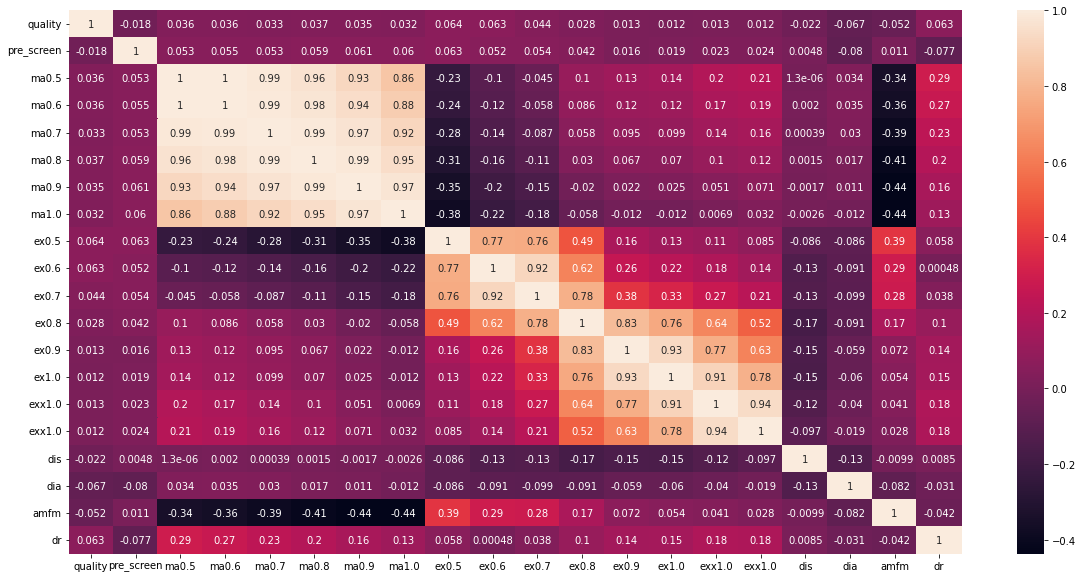

In [ ]:
#calculating the correlation
corrmat = diabetesDataset.corr(method ='pearson')
plt.figure(figsize=(20,10))
g=sns.heatmap(corrmat,annot=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


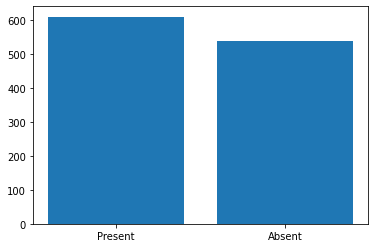

In [ ]:
#distribution of the positive and negative classes
target1 = diabetesDataset['dr']
diabetesDataset = diabetesDataset.drop("dr", 1)
classes = ['Present', 'Absent']
present = np.count_nonzero(target1 == 1)
absent = np.count_nonzero(target1 == 0)
array = [present, absent]
plt.bar(np.arange(len(classes)), array)
plt.xticks([0,1], classes)
plt.show()

In [ ]:
# distribution of the numerical data
num = diabetesDataset[["ma0.5","ma0.7","ma0.8", "ma1.0","ex0.5" ,"ex0.6" ,"ex0.7" , "ex0.8" ,"ex0.9", "ex1.0", "exx1.0" , "exx1.0", "dis","dia" ]]
num.describe()

,ma0.5,ma0.7,ma0.8,ma1.0,ex0.5,ex0.6,ex0.7,ex0.8,ex0.9,ex1.0,exx1.0,exx1.0,exx1.0,exx1.0,dis,dia
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,38.428323,35.140747,32.297133,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.085674,0.037225,0.523212,0.108431
std,25.620913,22.805400,21.114767,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.398717,0.178959,0.028055,0.017945
min,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906
25%,16.000000,15.000000,14.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799
50%,35.000000,32.000000,29.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.000000,0.000000,0.523308,0.106623
75%,55.000000,51.000000,48.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.004832,0.003851,0.543670,0.119591
max,151.000000,120.000000,105.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,5.937799,3.086753,0.592217,0.219199


In [ ]:
#normalizing the numerical data
diabetesDataset = diabetesDataset.drop('ma0.6', 1)
normalized_df=(diabetesDataset-diabetesDataset.min())/(diabetesDataset.max()-diabetesDataset.min())
normalized_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,quality,pre_screen,ma0.5,ma0.7,ma0.8,ma0.9,ma1.0,ex0.5,ex0.6,ex0.7,ex0.8,ex0.9,ex1.0,exx1.0,exx1.0,dis,dia,amfm
0,1.0,1.0,0.140000,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,1.0,1.0,0.153333,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,0.406667,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,1.0,1.0,0.360000,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,0.286667,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,0.220000,0.277311,0.307692,0.312500,0.261364,0.014179,0.005609,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0
1147,1.0,1.0,0.320000,0.403361,0.461538,0.458333,0.409091,0.155722,0.163809,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0
1148,1.0,0.0,0.320000,0.394958,0.423077,0.437500,0.363636,0.074612,0.083569,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0
1149,1.0,1.0,0.253333,0.235294,0.211538,0.125000,0.068182,0.099548,0.075419,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0


In [ ]:
#converting to an np-array
normalized_df = normalized_df.to_numpy()
target1 = target1.to_numpy()

# TASK 2

In [ ]:
#implementing KNN

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2,axis = -1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
minkowski = lambda x1, x2: np.power((np.sum(np.abs(x1 - x2)**3, axis=-1)), 1/3)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn                                                    
                                                                                  
        self.K = K
        return
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        
        num_test = x_test.shape[0]
                
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        
        knns = np.zeros((num_test, self.K), dtype=int)
        
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]  
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) 
        
        y_prob /= self.K                                                          
        return y_prob, knns

In [ ]:
#impementing decision trees

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    
        self.left = None                                    
        self.right = None                                   
        self.split_feature = None                           
        self.split_value = None                             
        if parent:
            self.depth = parent.depth + 1                   
            self.num_classes = parent.num_classes           
            self.data = parent.data                         
            self.labels = parent.labels                     
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) 
            self.class_prob = class_prob / np.sum(class_prob)  

def greedy_test(node, cost_fn):
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value


#misclassification cost
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

#cost entropy
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              
    return -np.sum(class_probs * np.log(class_probs))       

#gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               


#Decision Tree Class
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      
        self.root = None                
        self.cost_fn = cost_fn           
        self.num_classes = num_classes  
        self.min_leaf_instances = min_leaf_instances 
        
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        self._fit_tree(self.root)    
        return self                        
    
    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            class_probs[n,:] = node.class_prob
        return class_probs


    def _fit_tree(self, node):
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        if np.isinf(cost):
            return
        test = node.data[node.data_indices,split_feature] <= split_value
        node.split_feature = split_feature
        node.split_value = split_value
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        self._fit_tree(left)
        self._fit_tree(right)
        node.left = left
        node.right = right


In [ ]:
#accuracy calculation function
def evaluate_acc(true, tar):
      return np.sum(true == tar)/tar.shape[0] 

In [ ]:
#splitting data into training and testing for hepatitis
xhep, yhep = hepatitisDataset, target.astype(int)                                       
(Nhep,Dhep), Chep = xhep.shape, np.max(yhep)+1                                                     


np.random.seed(1234)
inds = np.random.permutation(Nhep)                                                     

bounds = (int) (Nhep*0.80)
x_train_hep, y_train_hep = xhep[inds[:bounds]], yhep[inds[:bounds]]
x_test_hep, y_test_hep = xhep[inds[bounds:]], yhep[inds[bounds:]]

In [ ]:
#splitting data into training and testing for di
xdi, ydi = normalized_df, target1.astype(int)                                    
(Ndi,Ddi), Cdi = xdi.shape, np.max(ydi)+1                                                     


np.random.seed(1234)
inds = np.random.permutation(Ndi)                                                     

bound = (int) (Ndi*0.80)
x_train_di, y_train_di = xdi[inds[:bound]], ydi[inds[:bound]]
x_test_di, y_test_di = xdi[inds[bound:]], ydi[inds[bound:]]

In [ ]:
#KNN for hepatitis
model_hep = KNN(K=23)

y_prob_hep, knns_hep = model_hep.fit(x_train_hep, y_train_hep).predict(x_test_hep)
print('knns shape:', knns_hep.shape)
print('y_prob shape:', y_prob_hep.shape)

y_pred_hep = np.argmax(y_prob_hep,axis=-1)                                                
accuracy_hep = np.sum(y_pred_hep == y_test_hep)/y_test_hep.shape[0]
print(f'accuracy is {accuracy_hep*100:.1f}.')

knns shape: (23, 23)
y_prob shape: (23, 2)
accuracy is 73.9.


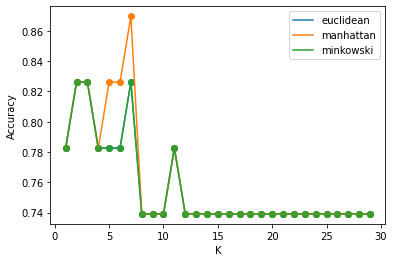

In [ ]:
#finding best k for hep, plotting, for different cost functions
o1 = []
o2 = []
o3 =  []
for i in range(1,30):
  model_hep = KNN(K=i, dist_fn= euclidean)
  y_prob_hep, knns_hep = model_hep.fit(x_train_hep, y_train_hep).predict(x_test_hep)
  y_pred_hep = np.argmax(y_prob_hep,axis=-1) 
  accuracy_hep = evaluate_acc(y_pred_hep,y_test_hep)
  o1.append([i, accuracy_hep])
for i in range(1,30):
  model_hep = KNN(K=i, dist_fn= manhattan)
  y_prob_hep, knns_hep = model_hep.fit(x_train_hep, y_train_hep).predict(x_test_hep)
  y_pred_hep = np.argmax(y_prob_hep,axis=-1) 
  accuracy_hep = evaluate_acc(y_pred_hep,y_test_hep)
  o2.append([i, accuracy_hep])
for i in range(1,30):
  model_hep = KNN(K=i, dist_fn= minkowski)
  y_prob_hep, knns_hep = model_hep.fit(x_train_hep, y_train_hep).predict(x_test_hep)
  y_pred_hep = np.argmax(y_prob_hep,axis=-1) 
  accuracy_hep = evaluate_acc(y_pred_hep,y_test_hep)
  o3.append([i, accuracy_hep])
o1 = np.array(o1)
o2 = np.array(o2)
o3 = np.array(o3)
plt.scatter(o1[:,0], o1[:,1])
plt.plot(o1[:,0], o1[:,1], label="euclidean")
plt.scatter(o2[:,0], o2[:,1])
plt.plot(o2[:,0], o2[:,1], label="manhattan")
plt.scatter(o3[:,0], o3[:,1])
plt.plot(o3[:,0], o3[:,1], label="minkowski")
plt.legend(loc="upper right")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#printing best k and cost_function combination for testing accuracy
#manhattan is giving highest accuracy
o2[:,1].argmax()
#at k = 7

6

In [ ]:
#KNN for dia
model_di = KNN(K=3)

y_prob_di, knns_di = model_di.fit(x_train_di, y_train_di).predict(x_test_di)
print('knns shape:', knns_di.shape)
print('y_prob shape:', y_prob_di.shape)

y_pred_di = np.argmax(y_prob_di,axis=-1)                                                
accuracy_di = np.sum(y_pred_di == y_test_di)/y_test_di.shape[0]
print(f'accuracy is {accuracy_di*100:.1f}.')

knns shape: (231, 3)
y_prob shape: (231, 2)
accuracy is 63.6.


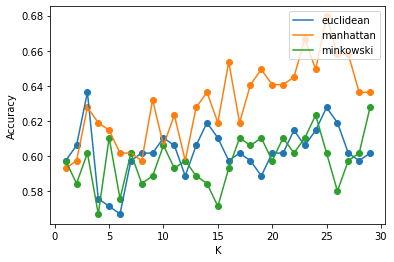

In [ ]:
#finding best k for dia, plotting, for different cost functions
o1 = []
o2 = []
o3 =  []
for i in range(1,30):
  model_di = KNN(K=i, dist_fn= euclidean)
  y_prob_di, knns_di = model_di.fit(x_train_di, y_train_di).predict(x_test_di)
  y_pred_di = np.argmax(y_prob_di,axis=-1) 
  accuracy_di = evaluate_acc(y_pred_di,y_test_di)
  o1.append([i, accuracy_di])
for i in range(1,30):
  model_di = KNN(K=i, dist_fn= manhattan)
  y_prob_di, knns_di = model_di.fit(x_train_di, y_train_di).predict(x_test_di)
  y_pred_di = np.argmax(y_prob_di,axis=-1) 
  accuracy_di = evaluate_acc(y_pred_di,y_test_di)
  o2.append([i, accuracy_di])
for i in range(1,30):
  model_di = KNN(K=i, dist_fn= minkowski)
  y_prob_di, knns_di = model_di.fit(x_train_di, y_train_di).predict(x_test_di)
  y_pred_di = np.argmax(y_prob_di,axis=-1) 
  accuracy_di = evaluate_acc(y_pred_di,y_test_di)
  o3.append([i, accuracy_di])

o1 = np.array(o1)
o2 = np.array(o2)
o3 = np.array(o3)
plt.scatter(o1[:,0], o1[:,1])
plt.plot(o1[:,0], o1[:,1], label="euclidean")
plt.scatter(o2[:,0], o2[:,1])
plt.plot(o2[:,0], o2[:,1], label="manhattan")
plt.scatter(o3[:,0], o3[:,1])
plt.plot(o3[:,0], o3[:,1], label="minkowski")
plt.legend(loc="upper right")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#printing best k and cost_function combination for testing accuracy
#manhattan is giving highest accuracy
max(o2[:,1])
#at k = 7

0.6796536796536796

In [ ]:
#decision tree for hepatitis
treehep = DecisionTree(max_depth=20)
probs_test_tree_hep = treehep.fit(x_train_hep, y_train_hep).predict(x_test_hep)
y_pred_tree_hep = np.argmax(probs_test_tree_hep,1)
accuracy_tree_hep = np.sum(y_pred_tree_hep == y_test_hep)/y_test_hep.shape[0]
print(f'accuracy is {accuracy_tree_hep*100:.1f}.')

accuracy is 65.2.


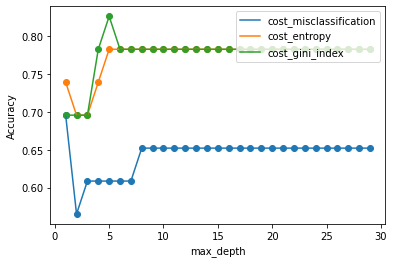

In [ ]:
#finding best depth for hep, plotting, for different cost functions
o1 = []
o2 = []
o3 =  []
for i in range(1,30):
  treehep = DecisionTree(max_depth=i, cost_fn = cost_misclassification)
  probs_test_tree_hep = treehep.fit(x_train_hep, y_train_hep).predict(x_test_hep)
  y_pred_tree_hep = np.argmax(probs_test_tree_hep,1)
  accuracy_tree_hep = evaluate_acc(y_pred_tree_hep, y_test_hep)
  o1.append([i, accuracy_tree_hep])
for i in range(1,30):
  treehep = DecisionTree(max_depth=i, cost_fn = cost_entropy)
  probs_test_tree_hep = treehep.fit(x_train_hep, y_train_hep).predict(x_test_hep)
  y_pred_tree_hep = np.argmax(probs_test_tree_hep,1)
  accuracy_tree_hep = evaluate_acc(y_pred_tree_hep, y_test_hep)
  o2.append([i, accuracy_tree_hep])
for i in range(1,30):
  treehep = DecisionTree(max_depth=i, cost_fn = cost_gini_index)
  probs_test_tree_hep = treehep.fit(x_train_hep, y_train_hep).predict(x_test_hep)
  y_pred_tree_hep = np.argmax(probs_test_tree_hep,1)
  accuracy_tree_hep = evaluate_acc(y_pred_tree_hep, y_test_hep)
  o3.append([i, accuracy_tree_hep])
o1 = np.array(o1)
o2 = np.array(o2)
o3 = np.array(o3)
plt.scatter(o1[:,0], o1[:,1])
plt.plot(o1[:,0], o1[:,1], label="cost_misclassification")
plt.scatter(o2[:,0], o2[:,1])
plt.plot(o2[:,0], o2[:,1], label="cost_entropy")
plt.scatter(o3[:,0], o3[:,1])
plt.plot(o3[:,0], o3[:,1], label="cost_gini_index")
plt.legend(loc="upper right")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#printing best max_depth and cost_function combination for testing accuracy
#gininindex is giving highest accuracy
o3[:,1].argmax()
#at h = 4 + 1

4

In [ ]:
#decision tree for diabetic retinopathy
treedi = DecisionTree(max_depth=20)
probs_test_tree_di = treedi.fit(x_train_di, y_train_di).predict(x_test_di)
y_pred_tree_di = np.argmax(probs_test_tree_di,1)
accuracy_tree_di = np.sum(y_pred_tree_di == y_test_di)/y_test_di.shape[0]
print(f'accuracy is {accuracy_tree_di*100:.1f}.')

accuracy is 61.0.


In [ ]:
#finding best deptgh for hep, plotting, for different cost functions
'''
o1 = []
o2 = []
o3 =  []
for i in range(1,20):
  treedi = DecisionTree(max_depth=i, cost_fn = cost_misclassification)
  probs_test_tree_di = treedi.fit(x_train_di, y_train_di).predict(x_test_di)
  y_pred_tree_di = np.argmax(probs_test_tree_di,1)
  accuracy_tree_di = np.sum(y_pred_tree_di == y_test_di)/y_test_di.shape[0]
  o1.append([i, accuracy_tree_di])
for i in range(1,20):
  treedi = DecisionTree(max_depth=i, cost_fn = cost_entropy)
  probs_test_tree_di = treedi.fit(x_train_di, y_train_di).predict(x_test_di)
  y_pred_tree_di = np.argmax(probs_test_tree_di,1)
  accuracy_tree_di = np.sum(y_pred_tree_di == y_test_di)/y_test_di.shape[0]
  o2.append([i, accuracy_tree_di])
for i in range(1,20):
  treedi = DecisionTree(max_depth=i, cost_fn = cost_gini_index)
  probs_test_tree_di = treedi.fit(x_train_di, y_train_di).predict(x_test_di)
  y_pred_tree_di = np.argmax(probs_test_tree_di,1)
  accuracy_tree_di = np.sum(y_pred_tree_di == y_test_di)/y_test_di.shape[0]
  o3.append([i, accuracy_tree_di])
o1 = np.array(o1)
o2 = np.array(o2)
o3 = np.array(o3)
plt.scatter(o1[:,0], o1[:,1])
plt.plot(o1[:,0], o1[:,1], label="cost_misclassification")
plt.scatter(o2[:,0], o2[:,1])
plt.plot(o2[:,0], o2[:,1], label="cost_entropy")
plt.scatter(o3[:,0], o3[:,1])
plt.plot(o3[:,0], o3[:,1], label="cost_gini_index")
plt.legend(loc="upper right")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()
'''

'\no1 = []\no2 = []\no3 =  []\nfor i in range(1,20):\n  treedi = DecisionTree(max_depth=i, cost_fn = cost_misclassification)\n  probs_test_tree_di = treedi.fit(x_train_di, y_train_di).predict(x_test_di)\n  y_pred_tree_di = np.argmax(probs_test_tree_di,1)\n  accuracy_tree_di = np.sum(y_pred_tree_di == y_test_di)/y_test_di.shape[0]\n  o1.append([i, accuracy_tree_di])\nfor i in range(1,20):\n  treedi = DecisionTree(max_depth=i, cost_fn = cost_entropy)\n  probs_test_tree_di = treedi.fit(x_train_di, y_train_di).predict(x_test_di)\n  y_pred_tree_di = np.argmax(probs_test_tree_di,1)\n  accuracy_tree_di = np.sum(y_pred_tree_di == y_test_di)/y_test_di.shape[0]\n  o2.append([i, accuracy_tree_di])\nfor i in range(1,20):\n  treedi = DecisionTree(max_depth=i, cost_fn = cost_gini_index)\n  probs_test_tree_di = treedi.fit(x_train_di, y_train_di).predict(x_test_di)\n  y_pred_tree_di = np.argmax(probs_test_tree_di,1)\n  accuracy_tree_di = np.sum(y_pred_tree_di == y_test_di)/y_test_di.shape[0]\n  o3.app

DECISION BOUNDARIES FOR HEPATITIS KNN



In [ ]:
#taking two highest negatively correlated features

x = hepatitisDataset[: ,[12,13]]
x_train_subset = x_train_hep[:, [12,13]]
print(x)
print(x_train_subset)
print(x.shape)

#we can make the grid finer by increasing the number of samples from 200 to higher value
#I'm guessing we want one that's closer to our size of uor dataset aka not 200?
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 100)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 100)


#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T
print(x_all.shape)

for k in range(1,4):
  model = KNN(K=k)

  y_train_prob = np.zeros((y_train_hep.shape[0], 2))
  y_train_prob[np.arange(y_train_hep.shape[0]), y_train_hep] = 1

  #to get class probability of all the points in the 2D grid
  y_prob_all, _ = model.fit(x_train_hep, y_train_hep).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(x_train_hep[:,0], x_train_hep[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.ylabel('ALBUMIN')
  plt.xlabel('ASCITES')
  plt.show()

[[2.         0.15555556]
 [2.         0.13333333]
 [2.         0.08888889]
 [2.         0.13333333]
 [2.         0.22222222]
 [2.         0.15555556]
 [2.         0.13333333]
 [2.         0.42222222]
 [2.         0.37777778]
 [2.         0.2       ]
 [2.         0.06666667]
 [2.         0.08888889]
 [2.         0.08888889]
 [2.         0.13333333]
 [2.         0.2       ]
 [2.         0.15555556]
 [2.         0.13333333]
 [2.         0.02222222]
 [2.         0.11111111]
 [2.         0.06666667]
 [2.         0.24444444]
 [2.         0.22222222]
 [2.         0.15555556]
 [2.         0.44444444]
 [2.         0.08888889]
 [2.         0.04444444]
 [2.         0.13333333]
 [2.         0.06666667]
 [2.         0.22222222]
 [2.         0.44444444]
 [2.         0.15555556]
 [2.         0.        ]
 [2.         0.08888889]
 [2.         0.15555556]
 [2.         0.08888889]
 [2.         0.08888889]
 [2.         0.06666667]
 [2.         0.33333333]
 [2.         0.11111111]
 [2.         0.08888889]


ValueError: ignored